# Linear Algebra: Singular Value Decomposition

This notebook generates visualizations for SVD transformation, image compression, and low-rank approximation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

## SVD Decomposition

In [2]:
# Example SVD
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

U, s, Vt = np.linalg.svd(A)

print(f"Matrix A ({A.shape[0]}x{A.shape[1]}):\n{A}\n")
print(f"U ({U.shape[0]}x{U.shape[1]}):\n{U}\n")
print(f"Singular values: {s}\n")
print(f"V^T ({Vt.shape[0]}x{Vt.shape[1]}):\n{Vt}")

Matrix A (4x3):
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

U (4x4):
[[-0.14087668 -0.82471435  0.53819245 -0.10172949]
 [-0.34394629 -0.42626394 -0.64176525  0.53678428]
 [-0.54701591 -0.02781353 -0.33104685 -0.7683801 ]
 [-0.75008553  0.37063688  0.43461965  0.33332531]]

Singular values: [2.54624074e+01 1.29066168e+00 1.47968026e-15]

V^T (3x3):
[[-0.50453315 -0.5745157  -0.64449826]
 [ 0.76077568  0.05714052 -0.64649464]
 [-0.40824829  0.81649658 -0.40824829]]


## Geometric Interpretation - SVD Transformation Steps

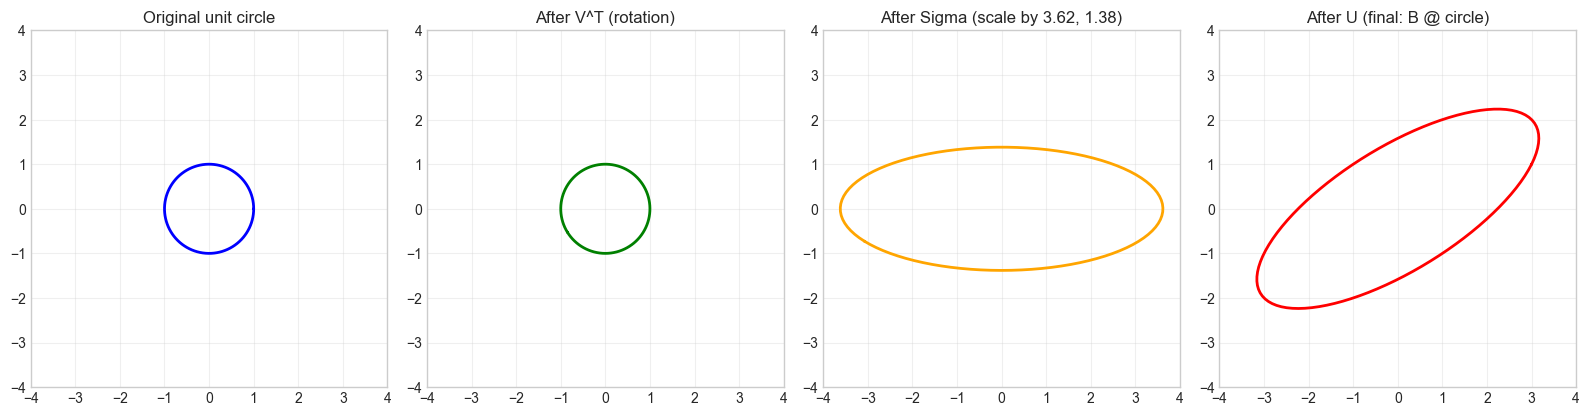

In [3]:
# Visualize SVD transformation of the unit circle
theta = np.linspace(0, 2*np.pi, 100)
circle = np.vstack([np.cos(theta), np.sin(theta)])

# 2D transformation matrix
B = np.array([[3, 1],
              [1, 2]])

U, s, Vt = np.linalg.svd(B)

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Step 1: Original circle
axes[0].plot(circle[0], circle[1], 'b-', linewidth=2)
axes[0].set_title('Original unit circle')
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-4, 4)
axes[0].set_ylim(-4, 4)

# Step 2: After V^T rotation
after_Vt = Vt @ circle
axes[1].plot(after_Vt[0], after_Vt[1], 'g-', linewidth=2)
axes[1].set_title('After V^T (rotation)')
axes[1].set_aspect('equal')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(-4, 4)
axes[1].set_ylim(-4, 4)

# Step 3: After Sigma scaling
Sigma_2d = np.diag(s)
after_sigma = Sigma_2d @ after_Vt
axes[2].plot(after_sigma[0], after_sigma[1], 'orange', linewidth=2)
axes[2].set_title(f'After Sigma (scale by {s[0]:.2f}, {s[1]:.2f})')
axes[2].set_aspect('equal')
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim(-4, 4)
axes[2].set_ylim(-4, 4)

# Step 4: After U rotation (final result)
final = U @ after_sigma
axes[3].plot(final[0], final[1], 'r-', linewidth=2)
axes[3].set_title('After U (final: B @ circle)')
axes[3].set_aspect('equal')
axes[3].grid(True, alpha=0.3)
axes[3].set_xlim(-4, 4)
axes[3].set_ylim(-4, 4)

plt.tight_layout()
plt.savefig('../../static/img/post/linear-algebra/svd-transformation.png', dpi=150, bbox_inches='tight')
plt.show()

## Low-Rank Approximation

In [4]:
def low_rank_approx(U, s, Vt, k):
    """Compute rank-k approximation from SVD."""
    return U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]

# Example
np.random.seed(42)
A = np.random.randn(10, 8)
U, s, Vt = np.linalg.svd(A)

print(f"Singular values: {s}")
print(f"\nApproximation errors (Frobenius norm):")

for k in [1, 2, 3, 5, 8]:
    A_k = low_rank_approx(U, s, Vt, k)
    error = np.linalg.norm(A - A_k, 'fro')
    theoretical_error = np.sqrt(np.sum(s[k:]**2))
    print(f"  Rank-{k}: error = {error:.4f} (theoretical: {theoretical_error:.4f})")

Singular values: [5.10307918 4.21159216 3.68102321 2.44485327 2.29083289 1.66009292
 1.4380844  0.52343746]

Approximation errors (Frobenius norm):
  Rank-1: error = 6.9000 (theoretical: 6.9000)
  Rank-2: error = 5.4656 (theoretical: 5.4656)
  Rank-3: error = 4.0402 (theoretical: 4.0402)
  Rank-5: error = 2.2579 (theoretical: 2.2579)
  Rank-8: error = 0.0000 (theoretical: 0.0000)


## Image Compression with SVD

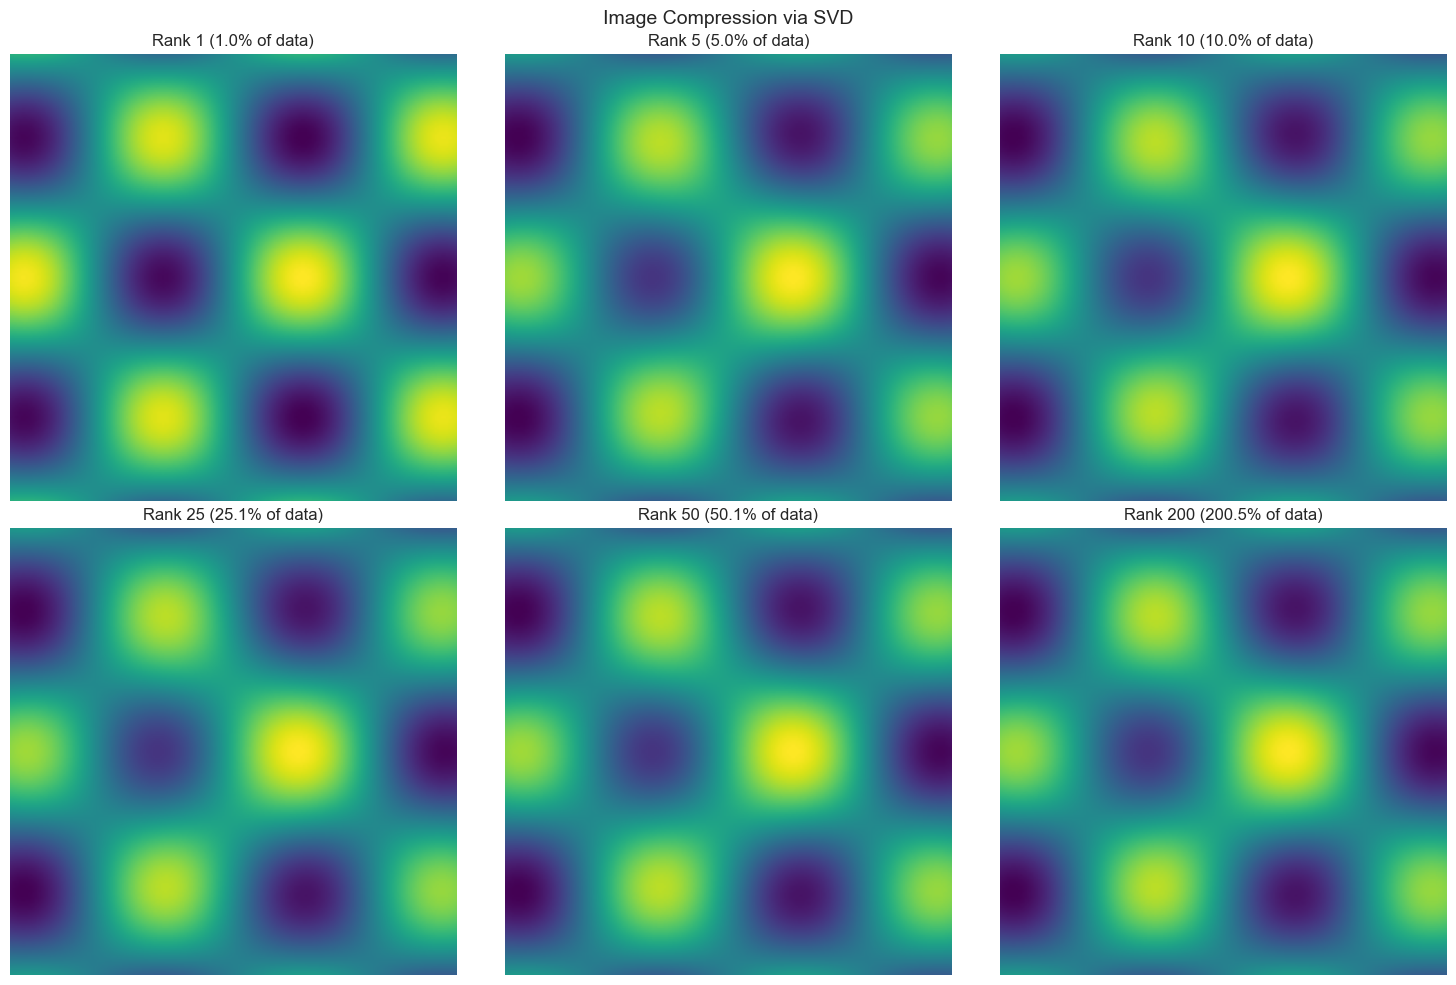

In [5]:
# Create a synthetic grayscale image
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
image = np.sin(X) * np.cos(Y) + 0.5 * np.exp(-(X**2 + Y**2) / 10)

# Compute SVD
U, s, Vt = np.linalg.svd(image)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

ranks = [1, 5, 10, 25, 50, 200]
for ax, k in zip(axes.flat, ranks):
    compressed = low_rank_approx(U, s, Vt, k)
    compression_ratio = (k * (200 + 200 + 1)) / (200 * 200) * 100

    ax.imshow(compressed, cmap='viridis')
    ax.set_title(f'Rank {k} ({compression_ratio:.1f}% of data)')
    ax.axis('off')

plt.suptitle('Image Compression via SVD', fontsize=14)
plt.tight_layout()
plt.savefig('../../static/img/post/linear-algebra/svd-image-compression.png', dpi=150, bbox_inches='tight')
plt.show()

## The Pseudoinverse

In [6]:
def pseudoinverse_svd(A, tol=1e-10):
    """Compute pseudoinverse via SVD."""
    U, s, Vt = np.linalg.svd(A)

    # Invert non-zero singular values
    s_inv = np.zeros_like(s)
    s_inv[s > tol] = 1.0 / s[s > tol]

    # Construct pseudoinverse
    Sigma_plus = np.zeros((A.shape[1], A.shape[0]))
    np.fill_diagonal(Sigma_plus, s_inv)

    return Vt.T @ Sigma_plus @ U.T

# Test with a non-square, rank-deficient matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

A_pinv_custom = pseudoinverse_svd(A)
A_pinv_numpy = np.linalg.pinv(A)

print(f"Pseudoinverse (custom):\n{A_pinv_custom}\n")
print(f"Pseudoinverse (NumPy):\n{A_pinv_numpy}\n")
print(f"Match: {np.allclose(A_pinv_custom, A_pinv_numpy)}")

Pseudoinverse (custom):
[[-0.48333333 -0.24444444 -0.00555556  0.23333333]
 [-0.03333333 -0.01111111  0.01111111  0.03333333]
 [ 0.41666667  0.22222222  0.02777778 -0.16666667]]

Pseudoinverse (NumPy):
[[-0.48333333 -0.24444444 -0.00555556  0.23333333]
 [-0.03333333 -0.01111111  0.01111111  0.03333333]
 [ 0.41666667  0.22222222  0.02777778 -0.16666667]]

Match: True


## Condition Number Visualization

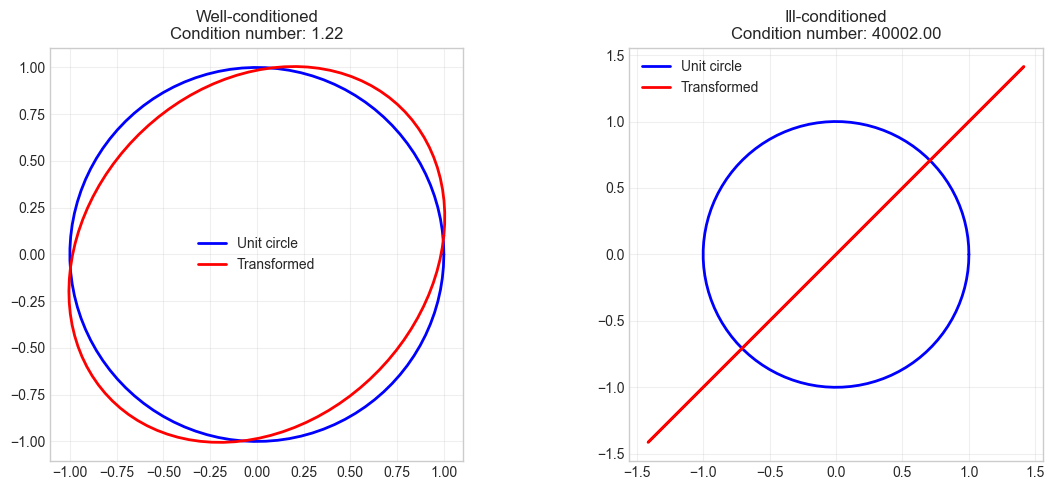

In [7]:
# Well-conditioned matrix
A_good = np.array([[1, 0.1],
                   [0.1, 1]])

# Ill-conditioned matrix
A_bad = np.array([[1, 1],
                  [1, 1.0001]])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, (name, A) in zip(axes, [("Well-conditioned", A_good), ("Ill-conditioned", A_bad)]):
    U, s, Vt = np.linalg.svd(A)
    cond = s[0] / s[-1]
    
    # Transform unit circle
    circle = np.vstack([np.cos(theta), np.sin(theta)])
    ellipse = A @ circle
    
    ax.plot(circle[0], circle[1], 'b-', linewidth=2, label='Unit circle')
    ax.plot(ellipse[0], ellipse[1], 'r-', linewidth=2, label='Transformed')
    ax.set_title(f'{name}\nCondition number: {cond:.2f}')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.savefig('../../static/img/post/linear-algebra/condition-number.png', dpi=150, bbox_inches='tight')
plt.show()